# 주제1. 사격 정확도가 가장 높은 선수 뽑기.

In [2]:
## 분석을 위해 사용할 모듈 가져오기

import requests
import ast
import pandas as pd
import json
import os 
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

os.mkdir('data')
os.mkdir('preprocessed')
df = pd.read_csv('pcs3kr_telemetry.csv')

url_path = df['telemetry_path'] #telemetry_path 열을 불러온다.



## 40개의 list 내용물을 하나의 큰 total list로 합치기

total = []
for i in tqdm(url_path): 
    j = requests.get(i).text #telemetry 정보를 text로 불러오기
    dict_j = json.loads(j) #각 text를 json으로 변환
    for d in dict_j:
        total.append(d) 
    total



## total list에서 key 값 추출하기

all_key_list = []
for i in tqdm(total):
    key_list = list(i.keys()) #dict_keys 제거
    for k in key_list:
        all_key_list.append(k)
unique_key_list = list(set(all_key_list)) #key 중복값 제거



## 각각의 key값에 대한 정보를 csv 파일로 저장하기

for key in tqdm(unique_key_list):
    df = []
    for d in total: 
        if key in list(d.keys()): 
            df.append(d)  # 각각의 key값을 가지고 있는 딕셔너리를 df에 넣는 작업 
    df = pd.DataFrame(df)  
    df.to_csv(f"./data/{key}.csv", index=False)  # 각 key값의 딕셔너리를 위한 csv파일 저장


100%|██████████| 64/64 [04:26<00:00,  4.17s/it]


# 1) DPS

In [3]:
# 사격 능력을 평가하기 위해서 가장 중요한 점은 '플레이어의 사격이 얼마나 정확한가'이다.
# 정확한 사격이란, 데미지를 많이 입힐 수 있는 머리, 몸통을 향한 사격을 의미한다.
# 즉, 플레이어의 사격이 정확할수록 사격 횟수당 평균 damage가 높아질 것이므로
# DPS가 플레이어의 사격 정확도를 나타낼 수 있다고 여겨진다.

In [4]:
# 자주 사용하는 text를 json으로 변환하는 함수 생성

def str_to_dict(x):
    if type(x) == str and (x[0] == '{' or x[0] == '['):
        return ast.literal_eval(x) # ast.literal_eval()을 사용하여 텍스트를 json으로 변환
    else:
        return x


## damageTypeCategory.csv 살펴보기

data = pd.read_csv('data/damageTypeCategory.csv')

data = data.applymap(str_to_dict) # text를 json으로 변환

data[data['attackId'] ==-1].head(10) 

# attackId가 -1 인 경우는 자기장데미지, Groggy 상태 자체 데미지, vehicle 데미지, 낙하 데미지 등 플레이어의 에임공격과는 관련이 없기떄문에 제외시킬 필요가 있다.


,attackId,attacker,victim,damageTypeCategory,damageReason,damage,damageCauserName,isThroughPenetrableWall,common,_D,...,victimWeapon,victimWeaponAdditionalInfo,distance,isAttackerInVehicle,dBNOId,killer,assistant,victimGameResult,vehicle,item
0,-1,"{'name': 'AFK_Arden', 'teamId': 14, 'health': ...","{'name': 'AFK_Arden', 'teamId': 14, 'health': ...",Damage_Instant_Fall,NonSpecific,4.043933,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:00:21.467Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1,"{'name': 'PG_xiaopang', 'teamId': 11, 'health'...","{'name': 'PG_xiaopang', 'teamId': 11, 'health'...",Damage_VehicleCrashHit,NonSpecific,1.239979,Uaz_B_01_esports_C,False,{'isGame': 1},2020-09-10T09:00:49.943Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-1,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...",Damage_Groggy,None,0.000000,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:00:58.252Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...",Damage_Groggy,None,0.000000,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:00:59.247Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-1,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...",Damage_Groggy,None,0.000000,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:01:00.251Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,-1,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...",Damage_Groggy,None,0.000000,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:01:01.250Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,-1,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...",Damage_Groggy,None,0.000000,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:01:02.239Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,-1,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...",Damage_Groggy,None,0.000000,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:01:03.268Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,-1,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...",Damage_Groggy,None,0.000000,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:01:04.253Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,-1,"{'name': 'AFS_Jeonha', 'teamId': 1, 'health': ...","{'name': 'AFS_Jeonha', 'teamId': 1, 'health': ...",Damage_VehicleCrashHit,NonSpecific,7.216578,BP_Motorbike_04_C,False,{'isGame': 1},2020-09-10T09:01:20.302Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.head(20)

# PG_LexGod 선수와 AZG_Untop 선수의 충돌과정에서 굉장히 중요한 정보를 알 수 있다. Damage_Gun의 Damage가 0이 되는 원인에 대한 정보이다.
# 이는 AZG_Untop선수가 수류탄 공격에 dBNOId(그로기 상태에 빠지게 한 공격에 대한 정보를 기록하기 위한 Id) 로그가 찍히면서 그로기 데미지를 받기 시작하는데,
# PG_LexGod 선수의 총격이 그로기 상태의 AZG_Untop에게 데미지가 0으로 기록된다. 그후 킬이 확정되는 순간 더이상의 그로기 데미지 혹은 총격에 의한 데미지가 
# 없는 것을 확인할 수 있다.

## 즉 그로기 상태에서의 총격 데미지는 0으로 기록된다. ##
  

,attackId,attacker,victim,damageTypeCategory,damageReason,damage,damageCauserName,isThroughPenetrableWall,common,_D,...,victimWeapon,victimWeaponAdditionalInfo,distance,isAttackerInVehicle,dBNOId,killer,assistant,victimGameResult,vehicle,item
0,-1,"{'name': 'AFK_Arden', 'teamId': 14, 'health': ...","{'name': 'AFK_Arden', 'teamId': 14, 'health': ...",Damage_Instant_Fall,NonSpecific,4.043933,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:00:21.467Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,922747041,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 1...","{'name': 'PG_LexGod', 'teamId': 11, 'health': ...",Damage_Gun,HeadShot,64.357788,WeapBerylM762_C,False,{'isGame': 1},2020-09-10T09:00:42.250Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1308622857,"{'name': 'PG_LexGod', 'teamId': 11, 'health': ...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 1...",Damage_Gun,HeadShot,94.000000,WeapHK416_C,False,{'isGame': 1},2020-09-10T09:00:48.145Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1,"{'name': 'PG_xiaopang', 'teamId': 11, 'health'...","{'name': 'PG_xiaopang', 'teamId': 11, 'health'...",Damage_VehicleCrashHit,NonSpecific,1.239979,Uaz_B_01_esports_C,False,{'isGame': 1},2020-09-10T09:00:49.943Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 6...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 6...",Damage_Explosion_Grenade,NonSpecific,6.000000,ProjGrenade_C,False,{'isGame': 1},2020-09-10T09:00:56.231Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,35,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...",Damage_Explosion_Grenade,NonSpecific,NaN,ProjGrenade_C,False,{'isGame': 1},2020-09-10T09:00:56.232Z,...,WeapSmokeBomb_C_69,[],326.516174,False,922746880.0,NaN,NaN,NaN,NaN,NaN
6,35,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'PG_xiaopang', 'teamId': 11, 'health'...",Damage_Explosion_Grenade,NonSpecific,43.850502,ProjGrenade_C,False,{'isGame': 1},2020-09-10T09:00:56.232Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-1,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...",Damage_Groggy,None,0.000000,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:00:58.252Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...",Damage_Groggy,None,0.000000,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:00:59.247Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-1,"{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...","{'name': 'AZG_Untop', 'teamId': 3, 'health': 0...",Damage_Groggy,None,0.000000,PlayerFemale_A_C,False,{'isGame': 1},2020-09-10T09:01:00.251Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data = data[data['attackId'] != -1] # attackId = -1인경우 제거

data[data['attacker'].isnull()] # attacker가 null인 경우 확인

data = data.dropna(subset=['attacker', 'victim'], how='any') 
# attacker과 victim이 없는 데이터는 사격 정확도와 관련있다고 보기 힘들기 때문에 제거

data['attacker'] = data['attacker'].apply(lambda x: x['name'])
data['victim'] = data['victim'].apply(lambda x: x['name'])
data['common'] = data['common'].apply(lambda x: x['isGame'])
data.head()
# 필요한 정보만 담는 작업.

data.to_csv('preprocessed/damageTypeCategory.csv', index=False)

In [7]:
# 데미지가 0인 경우가 miss shot이라고 예상 했던 것과는 달리, Groggy상태의 적에게 가한 hit shot의 데미지 기록이 0으로 된다는 것을 발견했다.

# 여기서 DPS 지표의 한계점이 발생한다.

# 해당 40개의 매치는 4인 팀 플레이 '스쿼드'모드이기 때문에, Groggy상태가 존재한다. Groggy상태에서의 hit shot은 
# damage가 0으로 기록되기 때문에,
# 킬을 결정 짓는 중요한 hit shot임에도 불구하고 데이터 기록 방식에 의해 데미지 0의 의미없는 hit shot으로 여겨지게 된다.
# 따라서 솔로모드에서는 의미가 있겠지만, Groggy상태가 존재하는 듀오 혹은 스쿼드 모드에서는 
# damage 데이터를 이용한 DPS 지표로 사격 정확도를 의미하기 어렵다.

# 2) 명중률

In [8]:
# 가장 단순하게 플레이어의 사격 정확도를 측정할 수 있는 값은 사격시 적을 얼마나 자주 맞추는가
# 즉,'사격 명중률'이라고 생각한다. 

# (적중 횟수 / 총 사격 횟수)로 계산하여 선수가 총을 쐈을때 얼마나 적을 자주 맞추는지 평가를 시도해보았다.

In [9]:
## 선수별 총 사격 횟수 구하기 ##

fire_count = pd.read_csv('data/fireCount.csv').rename(columns={'_D': 'date'}) # fireCount 정보 불러오기
fire_count['character'] = fire_count['character'].apply(str_to_dict).apply(lambda x: x['name'])
fire_count.drop('_T', axis=1, inplace=True)
fire_count

,character,weaponId,fireCount,common,date
0,BJ_AKaN,Item_Weapon_Mk47Mutant_C,10,{'isGame': 0.10000000149011612},2020-09-10T08:58:27.568Z
1,BJ_AKaN,Item_Weapon_Mk47Mutant_C,20,{'isGame': 0.10000000149011612},2020-09-10T08:58:32.312Z
2,BJ_AKaN,Item_Weapon_Mk47Mutant_C,30,{'isGame': 0.10000000149011612},2020-09-10T08:58:33.536Z
3,FPC_Cross,Item_Weapon_SCAR-L_C,10,{'isGame': 1},2020-09-10T08:58:53.474Z
4,AZG_Untop,Item_Weapon_BerylM762_C,10,{'isGame': 1},2020-09-10T09:00:41.862Z
...,...,...,...,...,...
19213,ENT_kAyle,Item_Weapon_FNFal_C,140,{'isGame': 7.5},2020-10-10T12:33:08.860Z
19214,AF_daengchae,Item_Weapon_BerylM762_C,60,{'isGame': 7.5},2020-10-10T12:33:09.635Z
19215,ENT_Under,Item_Weapon_BerylM762_C,20,{'isGame': 7.5},2020-10-10T12:33:09.943Z
19216,AF_daengchae,Item_Weapon_BerylM762_C,70,{'isGame': 7.5},2020-10-10T12:33:10.573Z


In [10]:
# fireCount의 데이터 집계 방식은, 선수가 만약 30발을 쏘면, 30으로 저장되는 것이 아니라
# 10,20,30 순차적으로 10의 단위로 총 3번에 나눠서 데이터가 저장이 된다.

# 따라서 총 선수별 총 사격횟수를 구하기 위해서는 
# 선수와 총기로 그룹바이를 한 후에, fireCount의 max값을 집계하면 된다.
# 하지만 현재 데이터는 40개의 경기 정보를 합친 정보이기 때문에
# 그대로 진행할 경우 의도했던 것과 달리 집계되어야할 데이터가 누락되는 경우가 발생한다.

# 따라서 각각의 경기를 따로 분리하여 계산한 것을 합쳐야 한다.

In [11]:
match_info = pd.read_csv('data/MatchId.csv').rename(columns={'_D': 'date'}) # 각 경기별로 데이터를 추출하기 위해 MatchId 불러오기
match_info = match_info[['MatchId', 'date']] # fireCount에는 MatchId정보가 없어 date 정보로 경기를 구분을 시도

match_info['start_date'] = match_info['date']
match_info['end_date'] = match_info['date'].shift(-1) # 각 경기를 date로 구분짓기 위해서 다음경기 시간을 end_date로 설정
match_info.drop('date', axis=1, inplace=True)
match_info.fillna('9999', inplace=True) # shift(-1)을 했기때문에 마지막 end_date의 정보는 존재하지 않아서 임의적으로 9999값으로 이전 경기보다 더 큰 값을 생성
match_info.head()

,MatchId,start_date,end_date
0,match.bro.custom.es_as-pcs3kr_01.steam.normal....,2020-09-10T08:57:06.143368Z,2020-09-10T09:37:54.2904484Z
1,match.bro.custom.es_as-pcs3kr_02.steam.normal....,2020-09-10T09:37:54.2904484Z,2020-09-10T10:18:36.4155053Z
2,match.bro.custom.es_as-pcs3kr_01.steam.normal....,2020-09-10T10:18:36.4155053Z,2020-09-10T11:08:01.7263966Z
3,match.bro.custom.es_as-pcs3kr_02.steam.normal....,2020-09-10T11:08:01.7263966Z,2020-09-10T11:46:23.7424427Z
4,match.bro.custom.es_as-pcs3kr_01.steam.normal....,2020-09-10T11:46:23.7424427Z,2020-09-11T09:03:09.5870016Z


In [12]:
# 선수의 무기별 총 사격 횟수

for i in range(len(match_info)):
    start, end = match_info['start_date'][i], match_info['end_date'][i]
    
    df = fire_count[(fire_count['date'] >= start) & (fire_count['date'] < end)] 
    # 각 경기 사이에 집계된 fireCount를 추출하기위해 date를 이용
    
    if i == 0:
        fc = df.groupby(['character', 'weaponId'])['fireCount'].max().reset_index() 
        # 선수가 사용한 무기별로 fireCount max 값만 추출
    else:
        temp = df.groupby(['character', 'weaponId'])['fireCount'].max().reset_index()
        fc = fc.merge(temp, on=['character', 'weaponId'], how='outer', suffixes=(None, i))
        # 각 경기의 데이터를 합쳐주는 작업
fc.fillna(0, inplace=True)
fc 

,character,weaponId,fireCount,fireCount1,fireCount2,fireCount3,fireCount4,fireCount5,fireCount6,fireCount7,...,fireCount30,fireCount31,fireCount32,fireCount33,fireCount34,fireCount35,fireCount36,fireCount37,fireCount38,fireCount39
0,AFK_APXB,Item_Weapon_FNFal_C,30.0,20.0,0.0,20.0,30.0,0.0,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFK_APXB,Item_Weapon_SCAR-L_C,30.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFK_Arden,Item_Weapon_SKS_C,20.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AFK_Asag2,Item_Weapon_BerylM762_C,10.0,60.0,40.0,50.0,20.0,30.0,10.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFK_Caley,Item_Weapon_FNFal_C,30.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,DNW_LeClo,Item_Weapon_SmokeBomb_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
845,EM_Smoke,Item_Weapon_M16A4_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
846,GRF_Asura,Item_Weapon_SCAR-L_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
847,OPGG_Silky,Item_Weapon_M24_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0


In [13]:
# 각 경기 총 사격횟수를 선수가 사용한 무기별로 모두 sum
fc['total_count'] = fc.drop(['character', 'weaponId'], axis=1).sum(axis=1) 
fc

,character,weaponId,fireCount,fireCount1,fireCount2,fireCount3,fireCount4,fireCount5,fireCount6,fireCount7,...,fireCount31,fireCount32,fireCount33,fireCount34,fireCount35,fireCount36,fireCount37,fireCount38,fireCount39,total_count
0,AFK_APXB,Item_Weapon_FNFal_C,30.0,20.0,0.0,20.0,30.0,0.0,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0
1,AFK_APXB,Item_Weapon_SCAR-L_C,30.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
2,AFK_Arden,Item_Weapon_SKS_C,20.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
3,AFK_Asag2,Item_Weapon_BerylM762_C,10.0,60.0,40.0,50.0,20.0,30.0,10.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0
4,AFK_Caley,Item_Weapon_FNFal_C,30.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,DNW_LeClo,Item_Weapon_SmokeBomb_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0
845,EM_Smoke,Item_Weapon_M16A4_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0
846,GRF_Asura,Item_Weapon_SCAR-L_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,40.0
847,OPGG_Silky,Item_Weapon_M24_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0


In [14]:
# 선수의 40경기 총 사격 횟수
total_count = fc.groupby('character')['total_count'].sum().reset_index()
total_count.to_csv('preprocessed/total_fire_count.csv', index=False)
total_count

,character,total_count
0,AFK_APXB,730.0
1,AFK_Arden,550.0
2,AFK_Asag2,660.0
3,AFK_Caley,390.0
4,AFS_BBABBO,970.0
...,...,...
128,VSG_WICK2D,520.0
129,emT_Gyuyeon,2620.0
130,emT_Hwarang,2470.0
131,emT_Piky,2210.0


In [15]:
damage = pd.read_csv('preprocessed/damageTypeCategory.csv')

# hit shot을 구하기 위해 총상만 남기기
hit_shot = damage[damage['damageTypeCategory'] == 'Damage_Gun']

# 선수별 총 hit shot
total_hit = hit_shot.groupby('attacker')['damage'].count()
total_hit

total_hit = total_hit.reset_index().sort_values('attacker')
total_hit = total_hit.reset_index(drop=True)
total_hit.head(133)


,attacker,damage
0,AFK_APXB,65
1,AFK_Arden,102
2,AFK_Asag2,63
3,AFK_Caley,18
4,AFS_BBABBO,124
...,...,...
128,VSG_WICK2D,84
129,emT_Gyuyeon,308
130,emT_Hwarang,273
131,emT_Piky,237


In [16]:
# 명중 횟수 / 총 사격 횟수 = 명중률
acc = total_hit['damage'] / total_count['total_count']

acc = total_hit.assign(acc=acc)
acc = acc.sort_values('acc',ascending=False)

acc.head(10)

,attacker,damage,acc
66,GXG_Vir,99,0.247500
53,GG_Becky,96,0.240000
63,GXG_Chaebin,119,0.208772
1,AFK_Arden,102,0.185455
118,T1_Starlord,253,0.172109
18,BJ_Joy,189,0.168750
48,GEN_Pio,345,0.164286
64,GXG_Chunbae,86,0.162264
128,VSG_WICK2D,84,0.161538
59,GRF_Asura,184,0.158621


##### 명중률 1위는 GXG_Vir 선수!!

In [17]:
# 명중률 지표에 따르면 GXG_Vir 선수의 사격 정확도가 가장 높다.


# 명중률 지표의 한계점 :

# 100%확률로 팔을 맞추는 선수A와 머리만 맞추는 선수B가 있다고 가정했을때, 
# 이 둘의 명중률 지표 점수는 같다.명중률 지표는 '맞췄냐 못맞췄냐'만을 반영할 수 있기 때문이다.
# 분명 후자의 선수가 전자의 선수보다 훨씬 사격 정확도가 뛰어나지만 명중률 지표는 
# 이를 반영하지 못하는 치명적인 한계점이 있다. 이를 보완하기 위한 다른 지표를 생각해보았다.


# 3) 치명타율

In [18]:
#치명타율은 DPS와 같은 맥락으로, 단순히 맞췄냐 못맞췄냐가 아닌, 어느 부위를 맞추어 얼마나 치명적인 공격을 하였는가를 평가하는 지표이다.

#(맞춘 부위 * 부위에 따른 가중치 / 전체 사격 횟수)로 계산할 수 있다.

# Groggy상태의 상대에게 가하는 공격의 damage가 0으로 기록되어 DPS를 구할 수 없지만,
# 'damageReason'열에 맞춘 부위는 표시되는 점을 이용하여,
# 플레이어의 hit shot이 얼마나 critical한 영역을 맞추는지 평가하는 지표를 만들어 명중률 지표의 한계점을 보완하여 
# 더 효과적으로 선수들의 사격 정확도를 평가 할 수 있다.

In [19]:
# 각 부위별 가중치 계산을 위해 
# attack 로그 집계 횟수 상위 두자루(라이플 1정, 저격소총1정) 총기의 부위별 데미지 퍼센티지 계산
# 데미지표는 Battlegrounds.party사이트의 damage table을 참조하였습니다.

damage = pd.read_csv('preprocessed/damageTypeCategory.csv')
col = ['HeadShot',
    'TorsoShot',
    'PelvisShot',
    'LegShot',
    'ArmShot',]
ind = ['BerylM762_C','Mini14_C']
con = [[0.43,0.21,0.19,0.08,0.08],[0.40,0.21,0.20,0.10,0.09]]
pd.DataFrame(con, columns=col, index=ind)

# 각각 약 0.4 0.2 0.2 0.1 0.1과 비슷한 값을 가지고 있는 것을 볼 수 있다.
# 따라서 head shot의 경우를 만점으로 기준점을 잡고, 각각의 값에 *2.5를 해준다.
# 최종 가중치 값은 1 0.5 0.5 0.25 0.25가 된다.

,HeadShot,TorsoShot,PelvisShot,LegShot,ArmShot
BerylM762_C,0.43,0.21,0.19,0.08,0.08
Mini14_C,0.40,0.21,0.20,0.10,0.09


In [20]:
# 계산상의 편의를 위해 각 부위별 퍼센티지 조정

ratio = {
    'HeadShot': 1,
    'TorsoShot': 0.5,
    'PelvisShot': 0.5,
    'LegShot': 0.25,
    'ArmShot': 0.25,
}

In [21]:
# 총상만 남기기
hit_shot = damage[damage['damageTypeCategory'] == 'Damage_Gun']

# 선수별 각 부위별 hit shot
hit_shot = hit_shot.groupby(['attacker', 'damageReason'])['damage'].count()
hit_shot = hit_shot.reset_index()
hit_shot.head()

,attacker,damageReason,damage
0,AFK_APXB,ArmShot,11
1,AFK_APXB,HeadShot,8
2,AFK_APXB,LegShot,6
3,AFK_APXB,PelvisShot,11
4,AFK_APXB,TorsoShot,29


In [22]:
hit_shot['criticalPoint'] = hit_shot['damage'] * hit_shot['damageReason'].apply(lambda x: ratio[x]) # hit shot 부위별 가중치 적용한 criticalPoint 생성
hit_shot.head()


,attacker,damageReason,damage,criticalPoint
0,AFK_APXB,ArmShot,11,2.75
1,AFK_APXB,HeadShot,8,8.00
2,AFK_APXB,LegShot,6,1.50
3,AFK_APXB,PelvisShot,11,5.50
4,AFK_APXB,TorsoShot,29,14.50


In [23]:
hit_shot_point = hit_shot.groupby('attacker')['criticalPoint'].sum().sort_values(ascending=False) # 선수별 criticalPoint 합
hit_shot_point

attacker
AZG_Rage      257.75
GRF_2heart    207.00
VLG_Hikari    191.25
ENT_kAyle     188.75
ENT_Under     186.50
               ...  
STA_Tae9       12.25
GZ_Zed         12.00
VLG_PLIKHE     10.25
AFK_Caley       9.75
GRF_Feint       6.00
Name: criticalPoint, Length: 133, dtype: float64

In [24]:
hit_shot_point = hit_shot_point.reset_index().sort_values('attacker')   # 치명타율 계산을 위해 인덱스 재정렬
hit_shot_point = hit_shot_point.reset_index(drop=True) 
hit_shot_point.head()

,attacker,criticalPoint
0,AFK_APXB,32.25
1,AFK_Arden,47.50
2,AFK_Asag2,33.00
3,AFK_Caley,9.75
4,AFS_BBABBO,60.25


In [25]:
critical = hit_shot_point['criticalPoint']/total_count['total_count'] # criticalPoint / 총 사격횟수로 치명타율 값 구하기
critical = hit_shot_point.assign(criticalRate=critical)
critical = critical.assign(totalShot=total_count['total_count'])
critical_rank = critical.sort_values('criticalRate',ascending=False) # 치명타율 순위표 
critical_rank.to_csv('preprocessed/criticalRate.csv')
critical_rank

,attacker,criticalPoint,criticalRate,totalShot
66,GXG_Vir,54.75,0.136875,400.0
53,GG_Becky,49.00,0.122500,400.0
63,GXG_Chaebin,57.50,0.100877,570.0
118,T1_Starlord,130.75,0.088946,1470.0
1,AFK_Arden,47.50,0.086364,550.0
...,...,...,...,...
30,ELR_UNlimited,15.50,0.027679,560.0
96,PG_xiaopang,26.00,0.026531,980.0
3,AFK_Caley,9.75,0.025000,390.0
112,STA_Tae9,12.25,0.024500,500.0


<BarContainer object of 10 artists>

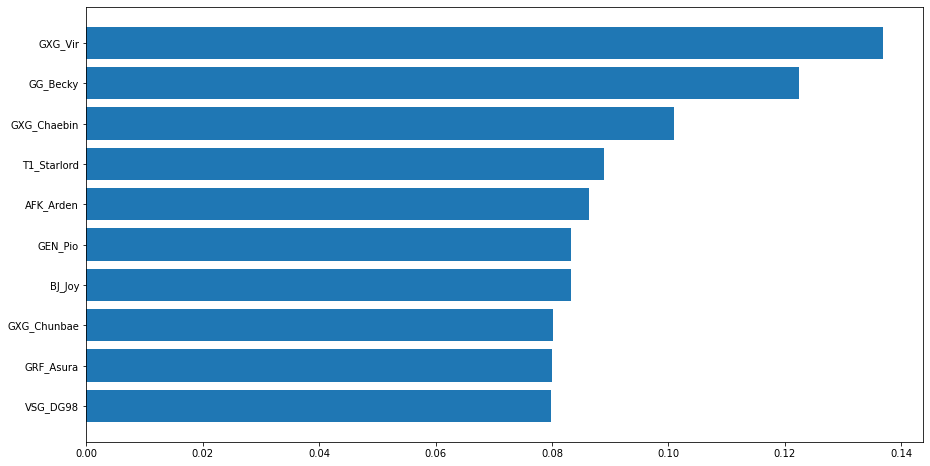

In [26]:
# 치명타율 선수별 순위 시각화

data = pd.read_csv('preprocessed/criticalRate.csv')
data = data.head(10)
data = data.sort_values('criticalRate')
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(data['attacker'], data['criticalRate'])

# 치명타율 1등은 GXG_Vir 선수!!!

# 2. 결론

     치명타율 지표가 선수들의 사격 정확도를 가장 잘 나타낸다.
     지표에 따라 사격 정확도가 가장 높은 선수는 GXG_Vir 선수이다.

In [ ]:
# Groggy상태의 적에게는 데미지가 0으로 집계된다는점에 의해 기본적으로 생각할 수 있는 1)DPS지표를 사용 할 수 없었습니다.

# 하지만 맞춘 부위에 관련된 정보는 데미지와 상관없이 모두 집계된다는 점을 이용하여, '적중 횟수 / 총 사격횟수'라는 2)명중률 지표를 만들었지만, 
# 맞춘 부위에 따른 차별점이 없어, 얼마나 효과적인 공격이였냐를 평가하지 못한다는 치명적인 한계점이 발견되었습니다.

# 따라서 명중률 한계점을 해결할 수 있는 새로운 지표의 필요성을 느껴 '적중부위 * 가중치 / 총 사격횟수'라는 3)치명타율 지표를 만들어 선수들의 사격 정확도를 평가했습니다.

# 치명타율 지표는 선수들의 명중률을 반영할 뿐만 아니라, 명중했던 총알이 얼만큼이나 데미지를 많이 줄 수 있는 부위(HeadShot, TorsoShot)를 맞췄냐까지 반영하기 때문에
# 선수들의 사격 정확도를 평가하는데 효과적인 지표라고 생각합니다. 

# 이를 바탕으로 치명타율 순위와 명중률 순위를 살펴볼때 확실한 차이가 보입니다.
# 4위였던 AFK_Arden선수가 치명타율 5위, 9위였던 VSG_WICK2D선수는 10위권 밖으로 밀려난 것을 알 수 있습니다.

# 치명타율 지표의 한계점 : Groggy상태의 적을 사격할 경우 Groggy상태의 플레이어는 기어다니기 때문에, 머리를 맞출 수 없는 각도에 있을 수 있어 치명타율이 
#                        낮아질 확률이 높다. 따라서 Groggy상태의 적을 많이 사격한 선수일수록 치명타율 지표 점수 평가에 불리하다.
# 데이터 집계 방식의 한계점 : 총 사격 횟수가 10의 단위로 집계되기 때문에 정밀한 계산이 불가능하다.

# 3. 번외

##### 주제와는 관련없지만 모든 Key값들을 분석하는 과정에서 발견했던 재미있는 순위를 뽑아보았습니다.


In [27]:
data = pd.read_csv('data/objectTypeAdditionalInfo.csv')
data = data.applymap(str_to_dict)
Fuel = data[data['objectTypeStatus'] == 'FuelSpill']
Fuel['character'] = Fuel['character'].apply(lambda x: x['name'])
Fuel = Fuel['character'].value_counts()
Fuel.to_csv('preprocessed/JerryCan_rank.csv', index=True)
data = pd.read_csv('data/objectTypeAdditionalInfo.csv')
data = data.applymap(str_to_dict)
music = data[data['objectTypeStatus'] == 'Play']
music['character'] = music['character'].apply(lambda x: x['name'])
music = music['character'].value_counts()
music.to_csv('preprocessed/music_rank.csv', index=True)

C:\Users\wnsgj\AppData\Local\Temp\ipykernel_11804\1355088924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fuel['character'] = Fuel['character'].apply(lambda x: x['name'])
C:\Users\wnsgj\AppData\Local\Temp\ipykernel_11804\1355088924.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['character'] = music['character'].apply(lambda x: x['name'])


In [28]:
## '불장난꾸러기'상 ENT_indigo 선수!! (최다 JerryCan spill)
df = pd.read_csv('preprocessed/JerryCan_rank.csv')
df.head()

,Unnamed: 0,character
0,ENT_indigo,9
1,AF_EJ,4
2,ENT_kAyle,3
3,AZG_Rage,2
4,GRF_Hwan2da,2


In [29]:
## '아무노래챌린지'상 GEN_Loki 선수!! (최다 Jukebox play)
df = pd.read_csv('preprocessed/music_rank.csv')
df

,Unnamed: 0,character
0,GEN_Loki,3
1,SP_maczora,2
2,BJ_AKaN,1
3,LVG_ZeniTh,1
4,LVG_ParkChaN,1


# 주제2. 앞서 정의한 사격 능력을 0-10점 사이의 점수로 만들기.

In [ ]:
# 치명타율은
# ( 맞춘 부위 횟수 * 부위에 따른 가중치 / 총 사격횟수) 이다.
# 따라서 선수가 가장 높은 점수를 받을 수 있는 경우는 모든 사격이 head shot을 했을 경우이다.

# head shot의 가중치는 1로 설정했기 때문에 치명타율의 최고점은 1이다.
# ex) 10발중 head shot 10발의 경우, (10(head shot) * 1)/10(total shot) = 1

# 따라서 치명타율에 *10를 해준다면 최고점을 10점으로하는 사격 능력 점수를 설정 할 수 있다.

In [30]:
critical['finalPoint'] = critical['criticalRate']*10 # 치명타율에 10를 곱해준다
critical.sort_values('finalPoint',ascending=False)

,attacker,criticalPoint,criticalRate,totalShot,finalPoint
66,GXG_Vir,54.75,0.136875,400.0,1.368750
53,GG_Becky,49.00,0.122500,400.0,1.225000
63,GXG_Chaebin,57.50,0.100877,570.0,1.008772
118,T1_Starlord,130.75,0.088946,1470.0,0.889456
1,AFK_Arden,47.50,0.086364,550.0,0.863636
...,...,...,...,...,...
30,ELR_UNlimited,15.50,0.027679,560.0,0.276786
96,PG_xiaopang,26.00,0.026531,980.0,0.265306
3,AFK_Caley,9.75,0.025000,390.0,0.250000
112,STA_Tae9,12.25,0.024500,500.0,0.245000


In [31]:
# 사격의 모든 경우의 수를 포함하려면 이러한 점수 집계 방식이 옳지만,
# 최고의 선수들이 모인 경기에서 1등인 선수의 점수가 1.36점이기 때문에 직관성을 위해 어느정도 점수조정이 필요해 보인다.

# 맞춘 부위 가중치인 ratio 변수를 조정하는 방법을 사용한다.

In [32]:
c_ratio = {
    'HeadShot': 5,
    'TorsoShot': 3,
    'PelvisShot': 3,
    'LegShot': 2,
    'ArmShot': 2,
}
hit_shot['criticalPoint'] = hit_shot['damage'] * hit_shot['damageReason'].apply(lambda x: c_ratio[x]) # hit shot 부위별 가중치 적용한 criticalPoint 생성
c_hit_shot_point = hit_shot.groupby('attacker')['criticalPoint'].sum().sort_values(ascending=False) # 선수별 criticalPoint 합
c_hit_shot_point = c_hit_shot_point.reset_index().sort_values('attacker')   # 치명타율 계산을 위해 인덱스 재정렬
c_hit_shot_point = c_hit_shot_point.reset_index(drop=True) 
critical = c_hit_shot_point['criticalPoint']/total_count['total_count'] # criticalPoint / 총 사격횟수로 치명타율 값 구하기
critical = c_hit_shot_point.assign(criticalRate=critical)
critical = critical.assign(totalShot=total_count['total_count'])
critical_rank = critical.sort_values('criticalRate',ascending=False) # 치명타율 순위표 
critical['finalPoint'] = critical['criticalRate']*10 # 치명타율에 10를 곱해준다
critical = critical.sort_values('finalPoint',ascending=False)
critical.to_csv('preprocessed/critical_10point_rank.csv')
critical

,attacker,criticalPoint,criticalRate,totalShot,finalPoint
66,GXG_Vir,318,0.795000,400.0,7.950000
53,GG_Becky,292,0.730000,400.0,7.300000
63,GXG_Chaebin,349,0.612281,570.0,6.122807
1,AFK_Arden,292,0.530909,550.0,5.309091
118,T1_Starlord,776,0.527891,1470.0,5.278912
...,...,...,...,...,...
30,ELR_UNlimited,94,0.167857,560.0,1.678571
96,PG_xiaopang,159,0.162245,980.0,1.622449
112,STA_Tae9,75,0.150000,500.0,1.500000
3,AFK_Caley,57,0.146154,390.0,1.461538


In [33]:
# 최고의 프로선수의 점수가 7.4점이지만, 이론상으로 10점을 넘는 경우가 충분히 가능하다.
# 이 점을 보완하기 위해서 10점을 초과하는 점수는 10점으로 표시되도록 한다.

## test를 위해 점수를 1.5배 증가시켰다. ##
df = pd.read_csv('preprocessed/critical_10point_rank.csv')
df['finalPoint'] = df['criticalRate']*15 # 치명타율에 15를 곱해준다
for i in range(len(df)):
    if df['finalPoint'][i] >= 10:
        df['finalPoint'][i] = 10
df.sort_values('finalPoint',ascending=False)

C:\Users\wnsgj\AppData\Local\Temp\ipykernel_11804\1251390381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['finalPoint'][i] = 10


,Unnamed: 0,attacker,criticalPoint,criticalRate,totalShot,finalPoint
0,66,GXG_Vir,318,0.795000,400.0,10.000000
1,53,GG_Becky,292,0.730000,400.0,10.000000
2,63,GXG_Chaebin,349,0.612281,570.0,9.184211
3,1,AFK_Arden,292,0.530909,550.0,7.963636
4,118,T1_Starlord,776,0.527891,1470.0,7.918367
...,...,...,...,...,...,...
128,30,ELR_UNlimited,94,0.167857,560.0,2.517857
129,96,PG_xiaopang,159,0.162245,980.0,2.433673
130,112,STA_Tae9,75,0.150000,500.0,2.250000
131,3,AFK_Caley,57,0.146154,390.0,2.192308


In [34]:
# 10점을 초과한 점수는 10점으로 표시되는 것을 볼 수 있다.

<BarContainer object of 10 artists>

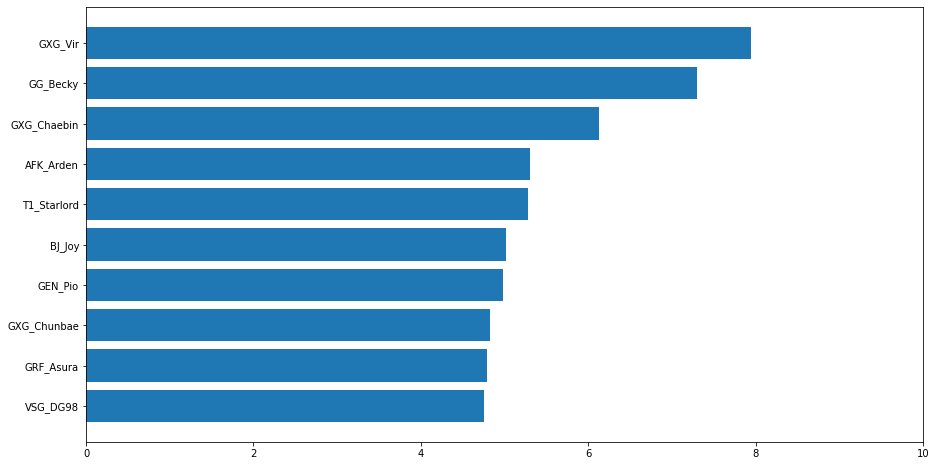

In [35]:
# 최종적으로 제가 선택한 지표는 1.5배 증가하기 전의 지표입니다.
critical = pd.read_csv('preprocessed/critical_10point_rank.csv')
critical['finalPoint'] = critical['criticalRate']*10 # 치명타율에 10을 곱해준다
for i in range(len(critical)):
    if critical['finalPoint'][i] >= 10:
        critical['finalPoint'][i] = 10
critical.sort_values('finalPoint',ascending=False)
critical = critical.head(10)
critical = critical.sort_values('finalPoint')
fig, ax = plt.subplots(figsize=(15, 8))
plt.xlim(0,10)
ax.barh(critical['attacker'], critical['finalPoint'])

# GXG_Vir 선수가 7.95점으로 1등을 차지했다.

# 결론

In [ ]:
# (치명타율 * 10)으로 10점만점의 점수를 만들었지만, 직관성이 부족하여 최고점을 이론상으로 50점의 획득이 가능한 조정된 점수를 만들고,
# 10점 이상의 점수는 모두 10점으로 집계되는 조정된 점수 평가표를 만들었습니다.
# 최고의 프로선수가 7.95점에 그치는 점수인 것을 감안하면, 
# 총 사격 횟수가 현저히 적거나, 저격소총만을 사용하여 명중률이 높아지는 경우 등을 제외하고는 
# 선수들의 사격 능력을 평가하기에 좋은 지표라고 생각하며 이 지표를 만들고, 선택하였습니다.

In [ ]:
# 치명타율을 이용해 1-10점의 점수를 표기하기 위해, 치명타율 * 10을 하여
# 모두 헤드샷을 맞출 경우 10점만점으로 표기되는 점수를 만들었지만,

# 이론상으로는 가능하지만 현실적으로 불가능에 가까운 점수이기때문에, 최고의 프로선수도 1.3에 그쳤다.
# 따라서 지표의 직관성을 높이기위해, 임의로 ratio수치를 증가시켰고, 그에따라 10점을 초과하는 점수는
# 10점으로 표기되게 만들었다.

# 한계점 : 직관성을 높이기위해 10을 초과할 수 있는 점수 지표를 만들고 10점을 초과한다면 10점으로 표기되게 만들었기 때문에, 
#         선수의 모든 총격이 헤드샷이 됐을경우, 이론적으로 50점의 점수를 받게된다. 따라서 10-50점 사이의 점수를 구분할 수 없다.